# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БСТ2201 Идрисов М.И. 
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [26]:
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt
inf = float('inf')

In [27]:
def optimize_graph(arr, type="adj"):
    n=len(arr)
    m=len(arr[0])
    ret=[]
    default_weight=1

    if type=="adj":
        for i in range(n):
            for j in range(n):
                if i==j:
                    continue
                if arr[i][j]==float('inf'):
                    continue
                ret.append([i,j,arr[i][j]])
    if type=="inc":
        for i in range(m):
            for j in range(n):
                if arr[j][i]==1:
                    el_from=j
                if arr[j][i]==-1:
                    el_to=j
            ret.append([el_from, el_to, default_weight])
    
    return ret

def get_nodes(arr):
    nodes=set()
    for i in arr:
        nodes.add(i[0])
        nodes.add(i[1])
    return nodes

def visualize_graph(arr,path=[]):
    G = nx.DiGraph()
    for el in arr:
        G.add_edge(el[0], el[1], weight=el[2])
    # Рисуем граф
    pos = nx.spring_layout(G, seed=1)  # Расположение узлов
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos)

    # Рисуем веса ребер
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path!=[]:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
    plt.show() 

def sum_weights(graph,path):
    weight=0
    path_edges = list(zip(path, path[1:]))
    for edge in graph:
        if (edge[0],edge[1]) in path_edges:
            weight+=edge[2]
    return weight



In [28]:
# 3 одинаковых графа
graphData=[
    [0,1,1],
    [0,2,1],
    [1,2,1],
    [2,1,1],
    [2,3,1]
]

adj = [
    [0,1,1,0],
    [0,0,1,0],
    [0,1,0,1],
    [0,0,0,0],
]

inc =[
    [ 1,  1, 0,  0, 0],
    [-1,  0, 1, -1, 0],
    [ 0, -1,-1,  1, 1],
    [ 0,  0, 0,  0,-1],
]

[[0, 1, 1], [1, 2, 1], [2, 3, 1], [3, 4, 1], [2, 0, 1], [4, 3, 1], [4, 5, 1], [5, 6, 1], [6, 0, 1], [0, 5, 1], [0, 4, 1]]
[[0, 1, 21], [0, 4, 20], [0, 5, 38], [1, 2, 10], [2, 0, 87], [2, 3, 17], [3, 4, 81], [4, 3, 81], [4, 5, 87], [5, 6, 37], [6, 0, 36]]


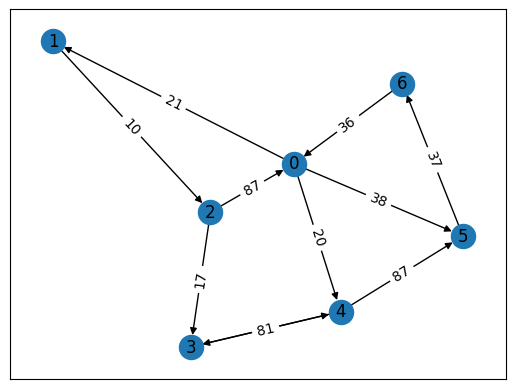

In [29]:
a, b = 0, 3
inc = [
    [ 1,  0,  0,  0, -1,  0,  0,  0,  -1,  1,1],
    [-1,  1,  0,  0,  0,  0,  0,  0,  0,  0,0],
    [ 0, -1,  1,  0,  1,  0,  0,  0,  0,  0,0],
    [ 0,  0, -1,  1,  0, -1,  0,  0,  0,  0,0],
    [ 0,  0,  0, -1,  0,  1,  1,  0,  0,  0,-1],
    [ 0,  0,  0,  0,  0,  0, -1,  1,  0, -1,0],
    [ 0,  0,  0,  0,  0,  0,  0, -1,  1,  0,0]
]

graph=optimize_graph(inc,type="inc")
print(graph)

adj = [
    [0, 21, inf, inf, 20, 38, inf],
    [inf, 0, 10, inf, inf, inf, inf],
    [87, inf, 0, 17, inf, inf, inf],
    [inf, inf, inf, 0, 81, inf, inf],
    [inf, inf, inf, 81, 0, 87, inf],
    [inf, inf, inf, inf, inf, 0, 37],
    [36, inf, inf, inf, inf, inf, 0],
]

graph=optimize_graph(adj,type="adj")
print(graph)

visualize_graph(graph)

[[0, 1, 1, 1, 4, 5, 5], [2, 1, 2, 2, 2, 2, 2], [0, 0, 2, 3, 3, 0, 0], [4, 4, 4, 3, 4, 4, 4], [5, 5, 5, 3, 4, 5, 5], [6, 6, 6, 6, 6, 5, 6], [0, 0, 0, 0, 0, 0, 6]]
[0, 1, 2, 3]


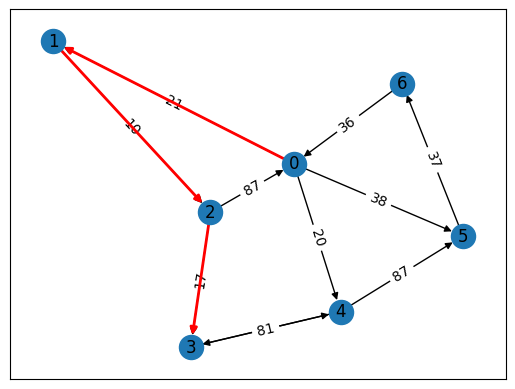

Кратчайший путь равен 48


In [30]:
def floydWarshall(graph):
    V=len(get_nodes(graph))
    # обьявляем массивы с расстояниями
    dist=[[inf]*V for _ in range(V)]
    next=[[None]*V for _ in range(V)]
    # добвляем известные значения
    for edge in graph:
        u,v=edge[0],edge[1]
        dist[u][v]=edge[2]
        next[u][v]=v
    # добвляем диагональные значения
    for i in range(V):
        dist[i][i]=0
        next[i][i]=i
    for k in range(V):
        for i in range(V):
            for j in range(V):
                if dist[i][j]>dist[i][k]+dist[k][j]:
                    dist[i][j]=dist[i][k]+dist[k][j]
                    next[i][j]=next[i][k]
    return next

def floydWarshallReconstruct(a,b,next):
    if next[a][b]==None:
        return []
    path=[a]
    while a!=b:
        a=next[a][b]
        path.append(a)
    return path

distances=floydWarshall(graph)
print(distances)
path=floydWarshallReconstruct(a,b,distances)
print(path)
visualize_graph(graph,path=path)
print("Кратчайший путь равен "+ str(sum_weights(graph,path)))


[0, 1, 2, 3]
[0, 21, 31, 48, 20, 38, 75]


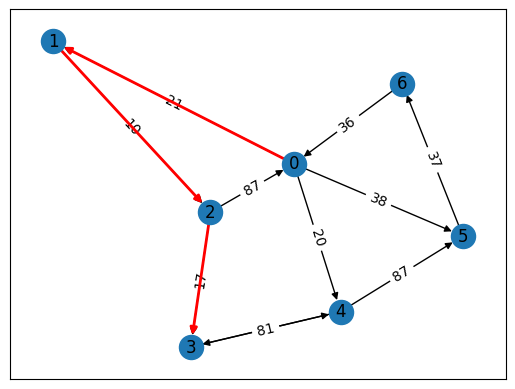

Кратчайший путь равен 48


In [31]:
def dijkstra(a,b,graph):
    V=len(get_nodes(graph))
    visited=[False]*V
    predecessors = [-1] * V
    distances=[float('inf')]*V
    distances[a]=0
    
    while True:
        min_dist=float('inf')
        current=None
        # ищем к какой прыгнуть следующей (минимальной)
        for i in range(V):
            if not visited[i] and distances[i]<min_dist:
                min_dist=distances[i]
                current=i

        if current is None:
            break

        visited[current]=True

        # новые расстояние для следующих от минимальной
        for edge in graph:
            if edge[0] == current:
                neighbor = edge[1]
                new_dist= distances[current] + edge[2]
                if new_dist< distances[neighbor]:
                    distances[neighbor] = new_dist
                    predecessors[neighbor] = current
    
    # достаем путь
    path=[]
    current=b
    while current!=-1:
        path.append(current)
        current=predecessors[current]
    path.reverse()

    return path if path[0] == a else [], distances

path, distance=dijkstra(a,b,graph)
print(path)
print(distance)


visualize_graph(graph,path=path)
print("Кратчайший путь равен "+ str(distance[b]))


[0, 21, 31, 48, 20, 38, 75]
[[0], [0, 1], [0, 1, 2], [0, 1, 2, 3], [0, 4], [0, 5], [0, 5, 6]]


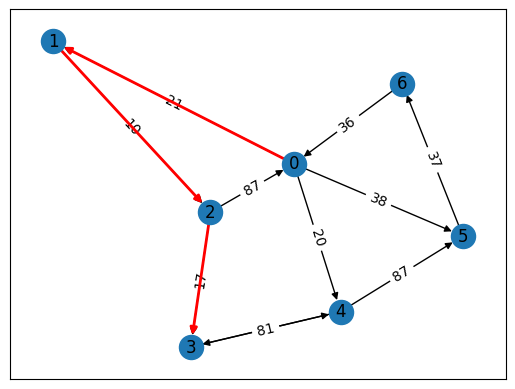

Кратчайший путь равен 48


In [32]:
def bellman_ford(graph, V, a):
    # Добавление дефолтных значений
    distances = [float('inf')] * V
    predecessors = [-1] * V
    distances[a] = 0

    # Ослабление (так написано в определении) рёбер
    for _ in range(V - 1):
        for u, v, w in graph:
            if distances[u] != float('inf') and distances[u] + w < distances[v]:
                distances[v] = distances[u] + w
                predecessors[v] = u

    # Проверка на циклы отрицательного веса
    for u, v, w in graph:
        if distances[u] != float('inf') and distances[u] + w < distances[v]:
            return None, None

    # достаем путь
    paths = [[] for _ in range(V)]
    for end in range(V):
        if distances[end] != float('inf'):
            current = end
            while current != -1:
                paths[end].insert(0, current)
                current = predecessors[current]

    return distances, paths
V=len(get_nodes(graph))
distances, path =bellman_ford(graph,V,a)
print(distances)
print(path)

visualize_graph(graph,path=path[b])
print("Кратчайший путь равен "+ str(distances[b]))

{0: [0, 21, 31, 48, 20, 38, 75], 1: [97, 0, 10, 27, 108, 135, 172], 2: [87, 108, 0, 17, 98, 125, 162], 3: [241, 262, 272, 0, 81, 168, 205], 4: [160, 181, 191, 81, 0, 87, 124], 5: [73, 94, 104, 121, 93, 0, 37], 6: [36, 57, 67, 84, 56, 74, 0]}
{0: [0, 1, 2, 3], 1: [1, 2, 3], 2: [2, 3], 3: [3], 4: [4, 3], 5: [5, 6, 0, 1, 2, 3], 6: [6, 0, 1, 2, 3]}


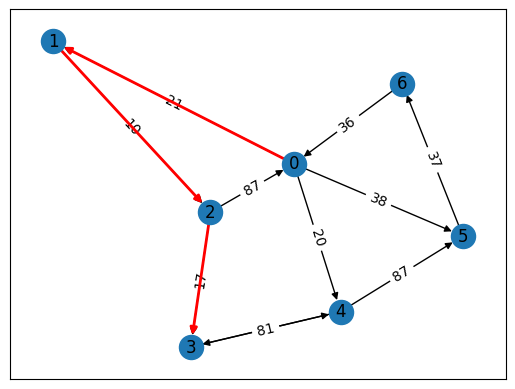

Кратчайший путь равен 48


In [33]:
def johnson(graph):
    V = len(get_nodes(graph))
    # Добавляем фиктивную вершину с рёбрами веса 0 ко всем остальным вершинам
    extended_graph = graph + [(V, i, 0) for i in range(V)]
    
    # Используем алгоритм Беллмана-Форда для перевзвешивания
    h, _ = bellman_ford(extended_graph, V + 1, V)
    if h is None:
        return None, None
    
    # Перевзвешиваем рёбра графа
    new_graph = [(u, v, w + h[u] - h[v]) for u, v, w in graph]
    
    # Используем алгоритм Дейкстры для каждой вершины
    all_distances = {}
    all_paths = {}
    for u in range(V):
        path, distances = dijkstra(u, b, new_graph)
        all_distances[u] = distances
        all_paths[u] = path
    
    # Восстанавливаем исходные веса путей
    for u in range(V):
        for v in range(V):
            if u != v and all_distances[u][v] < float('inf'):
                all_distances[u][v] += h[v] - h[u]
    
    return all_distances, all_paths

V=len(get_nodes(graph))
distances,path=johnson(graph)
print(distances)
print(path)
visualize_graph(graph,path=path[a])
print("Кратчайший путь равен "+ str(distances[a][b]))

[0, 21, 31, 48, 20, 38, 75]
[[], [0, 1], [0, 1, 2], [0, 1, 2, 3], [0, 4], [0, 5], [0, 5, 6]]


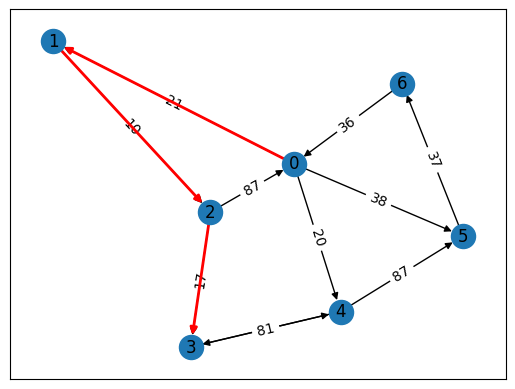

Кратчайший путь равен 48


In [34]:
from collections import deque

def levit(edges, V, start):
    # Инициализация
    distances = [float('inf')] * V
    distances[start] = 0
    pred = [-1] * V  # Предшественники для восстановления пути

    m1 = deque([start])  # Очередь с приоритетом
    m2 = set(range(V)) - {start}  # Основная очередь
    m0 = set()  # Множество обработанных вершин

    while m1 or m2:
        if m1:
            current = m1.popleft()
        else:
            current = m2.pop()

        for u, v, w in edges:
            if u == current and v not in m0:
                if distances[u] + w < distances[v]:
                    distances[v] = distances[u] + w
                    pred[v] = u
                    if v in m2:
                        m2.remove(v)
                        m1.append(v)
                    elif v not in m1:
                        m1.appendleft(v)  # Добавляем в начало очереди с приоритетом

        m0.add(current)

    # Восстановление путей
    paths = [[] for _ in range(V)]
    for end in range(V):
        if distances[end] != float('inf') and end != start:
            current = end
            while current != -1:
                paths[end].insert(0, current)
                current = pred[current]

    return distances, paths

V=len(get_nodes(graph))
distances,path=levit(graph,V,a)
print(distances)
print(path)
visualize_graph(graph,path=path[b])
print("Кратчайший путь равен "+ str(distances[b]))

[0, 21, 31, 48, 20, 38, 75]
[0, 1, 2, 3]


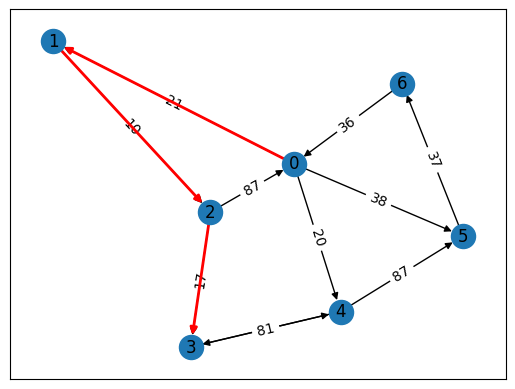

Кратчайший путь равен 48


In [35]:
def yen_algorithm(graph, start, end, k):
    # Находим первый кратчайший путь
    A = [dijkstra(start, end, graph)]
    B = []

    if not A[0][0]:
        return A  # Если путь не найден, возвращаем пустой список

    for i in range(1, k):
        # Инициализация
        for j in range(len(A[-1][0]) - 1):
            spur_node = A[-1][0][j]
            root_path = A[-1][0][:j + 1]

            # Удаление ссылок на spur_node из предыдущих кратчайших путей
            removed_edges = []
            for path in A:
                if len(path[0]) > j and path[0][j] == spur_node:
                    edge = (path[0][j], path[0][j + 1], None)
                    for edge_to_remove in graph:
                        if edge_to_remove[0] == edge[0] and edge_to_remove[1] == edge[1]:
                            removed_edges.append(edge_to_remove)
                            graph.remove(edge_to_remove)
                            break

            # Поиск spur path от spur node до конечной вершины
            spur_path = dijkstra(spur_node, end, graph)[0]

            if spur_path:
                # Полный путь - комбинация root path и spur path
                total_path = root_path[:-1] + spur_path
                total_distance = sum([graph[i][2] for i in range(len(total_path) - 1)
                                      if (total_path[i], total_path[i + 1], graph[i][2]) in graph])
                if total_path not in [p[0] for p in A] and total_path not in [p[0] for p in B]:
                    B.append((total_path, total_distance))

            # Возвращаем удаленные ребра обратно в граф
            graph.extend(removed_edges)

        if not B:
            break 

        # Выбираем путь с наименьшим весом из B
        B.sort(key=lambda x: x[1])
        A.append(B[0])
        B.pop(0)

    return A

A=yen_algorithm(graph,a,b,1)
path,distances = A[0]
print(distances)
print(path)
visualize_graph(graph,path=path)
print("Кратчайший путь равен "+ str(distances[b]))

### Вывод